In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

# Brewing beer

How to find the best recipe for a new beer without brewing a alrge number of trial batches?

In [34]:
from skopt import gp_minimize, gbrt_minimize, forest_minimize, dummy_minimize

In [30]:
from skopt import plots

In [3]:
from utils import beer_score

def inverse_beer_score(points):
    return -1. * beer_score(points)

In [21]:
res = gp_minimize(inverse_beer_score, [(2., 14.), (5., 80.)], n_calls=100, random_state=2)

In [59]:
res = gp_minimize(inverse_beer_score, [(2., 14.), (5., 80.)], n_calls=100, random_state=2,
                  n_random_starts=20)

In [28]:
res = gbrt_minimize(inverse_beer_score, [(2., 14.), (5., 80.)], n_calls=100, random_state=2)

In [41]:
res = forest_minimize(inverse_beer_score, [(2., 14.), (5., 80.)], n_calls=100, random_state=2)

In [53]:
res = forest_minimize(inverse_beer_score, [(2., 14.), (5., 80.)], n_calls=100,
                      n_random_starts=20,
                      random_state=2)

In [47]:
res = dummy_minimize(inverse_beer_score, [(2., 14.), (5., 80.)], n_calls=100, random_state=2)

In [54]:
print("best recipe (alcohol, bitterness): %.2f, %.2f" % (res.x[0], res.x[1]))
print("with a score of: %.4f" % res.fun)

best recipe (alcohol, bitterness): 5.10, 12.44
with a score of: -0.9920


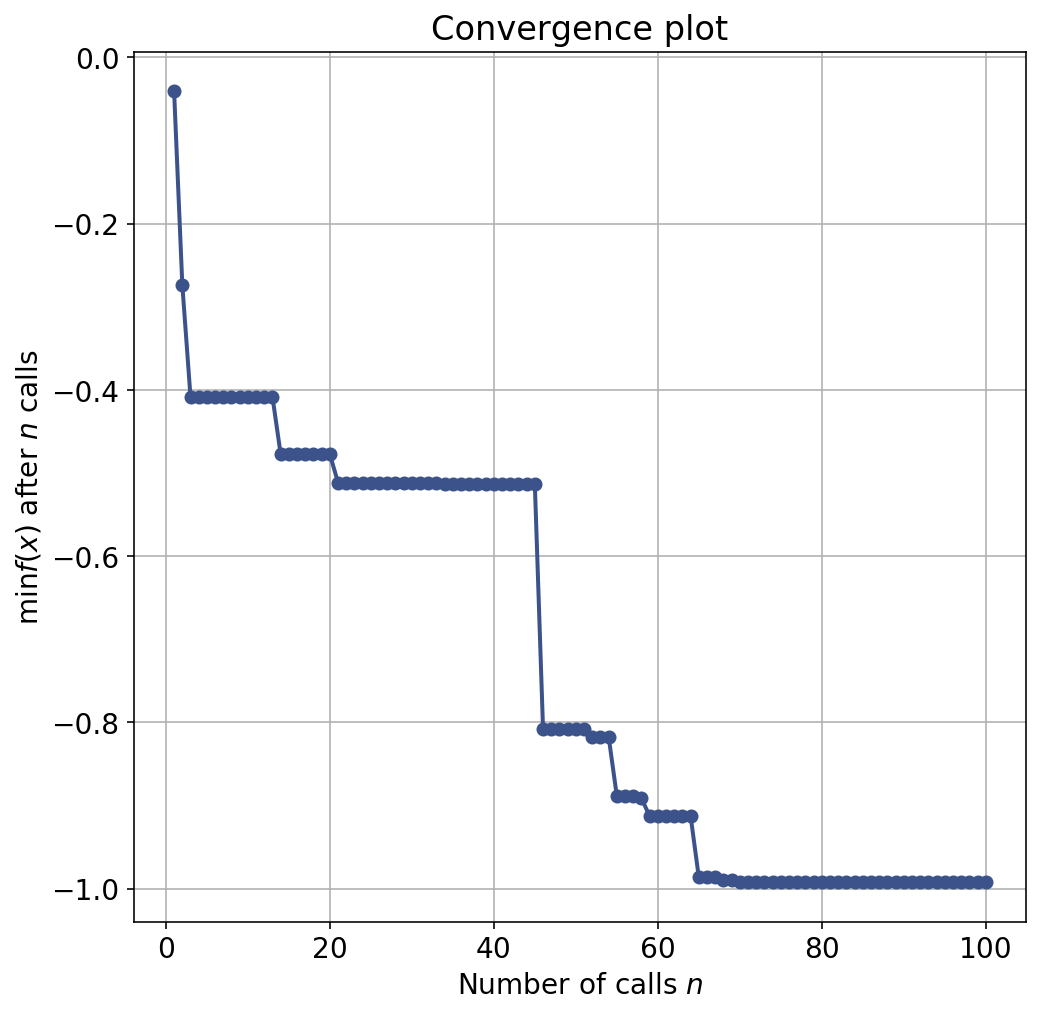

In [55]:
plots.plot_convergence(res);

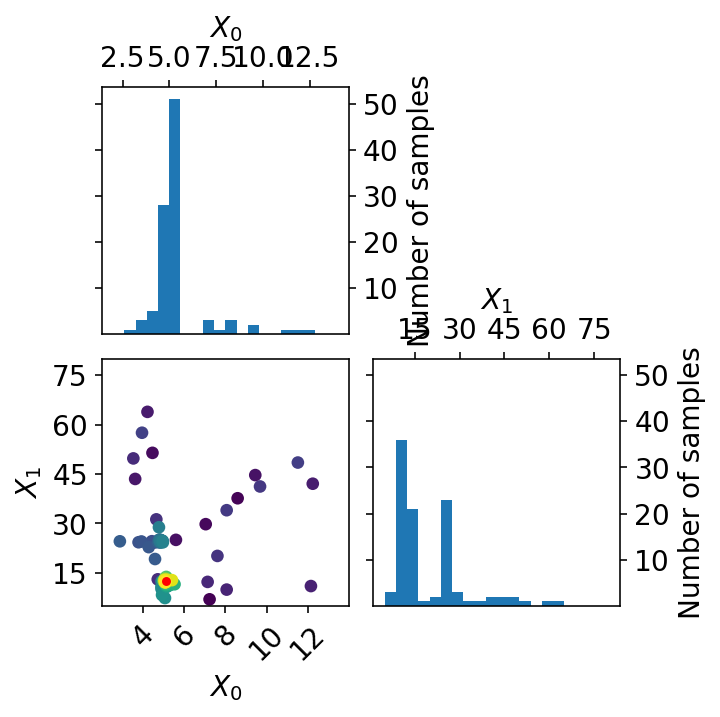

In [56]:
plots.plot_evaluations(res);

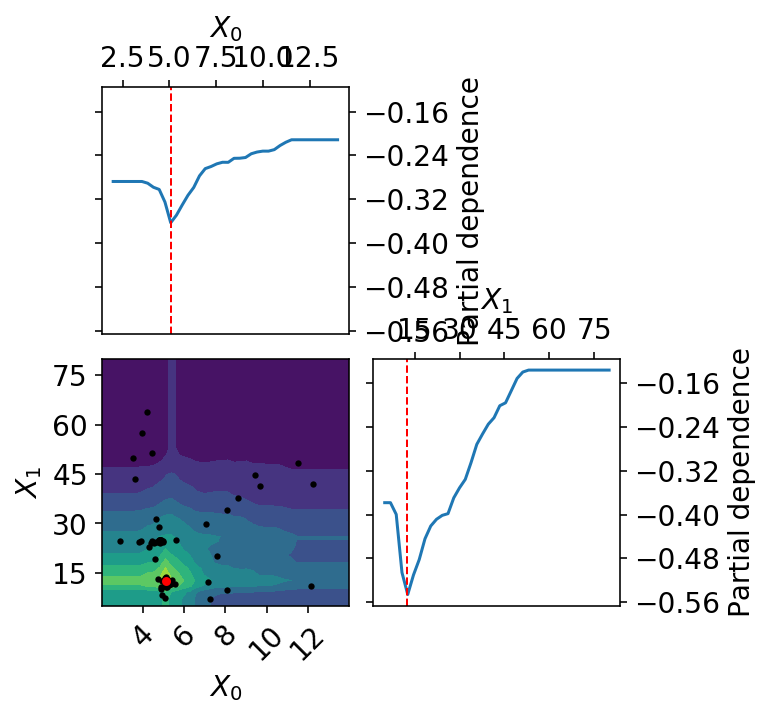

In [57]:
plots.plot_objective(res);

In [4]:
h = 0.02
xx, yy = np.meshgrid(np.arange(2, 14, h),
                     np.arange(5, 80, h))
Z = inverse_beer_score(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [5]:
Z.min(), np.c_[xx.ravel(), yy.ravel()][Z.argmin()]

(-0.99332241872141203, array([  5.1 ,  12.56]))

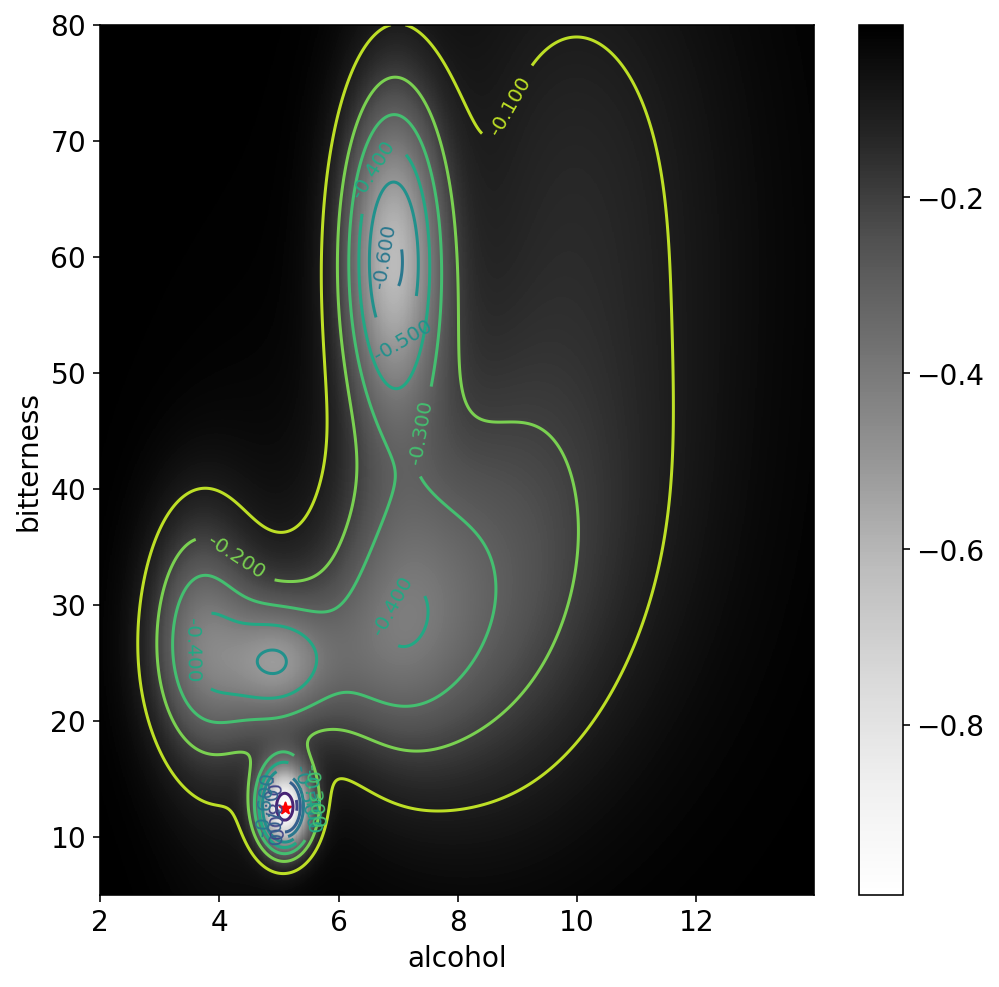

In [58]:
plt.pcolormesh(xx, yy, Z, cmap='Greys')
plt.colorbar();
CS = plt.contour(xx, yy, Z, 10, vmin=-1, vmax=0)
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(*res.x, marker="*", color='r')
plt.ylabel('bitterness')
plt.xlabel('alcohol');

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, -Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.view_init(0, 40)
ax.set_xlabel('alcohol')
ax.set_zlabel('score')
ax.set_ylabel('bitterness');